# Importing Libraries:

In [1]:
# Here we are importing all the necessary libraries. And installing face_recognition framework which was built specfically for face_detection.
!pip3 install face_recognition

import tensorflow as tf
import cv2
import face_recognition
import numpy as np
import os
from google.colab.patches import cv2_imshow 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100.1 MB 1.2 MB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566186 sha256=712377c1d9a1efb8ab0e5c9bf24c4b3a0a2f9fed999a47908ee47850089f6433
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


# Making directories

In [2]:
# Here we are making two directories known and unknown. We are uploading all the known images and also all the unknown images.
# We need to keep in mind that in known folder, we need to name the picture with a person's name. For example; Donald_Trump.jpg.
# For unknowns we can name as we wish.
# We can also add our pic and use webcam for testing.
!mkdir known

!mkdir unknown

# Preprocessing the images
Here we are reading the images and converting them to a specific size because the images can be of different sizes.


In [7]:

def read_img(path):
  img = cv2.imread(path)
  (h, w) = img.shape[:2]
  width = 500
  ratio = width / float(w)
  height = int(h * ratio)
  return cv2.resize(img, (width,height))



# Working on known_directory and finding the encodings:
Here we are creating a for loop to resize every image and get the encoding of each image using (face_recognition.face_encodings). We are also splitting the image name so that we can get the name of the image.


In [8]:
known_encodings = []
known_names = []
known_dir = 'known'

for file in os.listdir(known_dir):
  img = read_img(known_dir + '/' + file)
  img_enc = face_recognition.face_encodings(img)[0]
  known_encodings.append(img_enc)
  known_names.append(file.split('.')[0])

# Working on unknown_directory:
Now we are working on the unknown directory and passing them to preprocess the image and finding the encoding and then comparing them with the known_encoding we performed before. After getting the results we are performing the bounding box with the name we created in the known_names


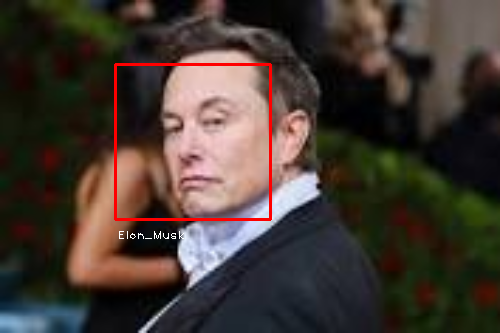

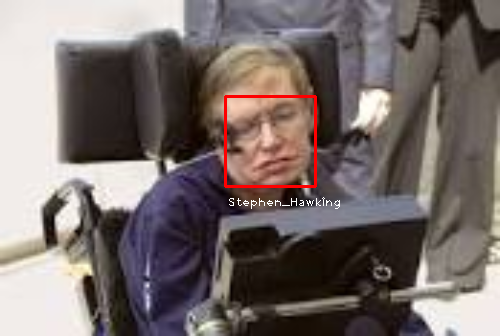

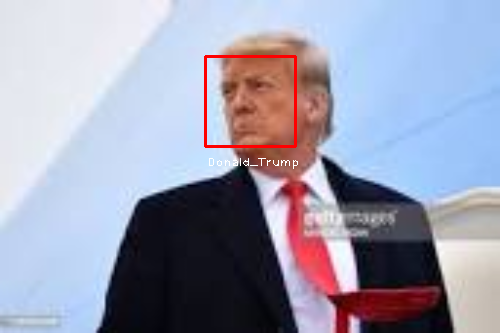

In [9]:

unknown_dir = 'unknown'
for file in os.listdir(unknown_dir):
  img = read_img(unknown_dir + '/' + file)
  img_enc = face_recognition.face_encodings(img)[0]
  
  results = face_recognition.compare_faces(known_encodings, img_enc)

  for i in range(len(results)):
    if results[i]:
      name = known_names[i]
      (top, right, bottom, left) = face_recognition.face_locations(img)[0]
      cv2.rectangle(img, (left, top), (right, bottom), (0, 0, 255), 2)
      cv2.putText(img, name, (left+2, bottom+20), cv2.FONT_HERSHEY_PLAIN, 0.8, (255, 255, 255), 1)
      cv2_imshow(img)

# Enabling the webcam through google colab and testing:

Accessing our webcam in Google Colab is not as straightforward. When we use Google Colab Runtime we have connected to a virtual machine. In order to utilize your local machine's webcam within the VM we can utilize JavaScript code.

We can find the JavaScript code in the code snipets.

This will open our local machine's webcam and we can capture an image and it will save our picture and test our object detection.

In [10]:
# Here we are using javascrpt code to use our local machine's webcam and capture our picture to predict the name.

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


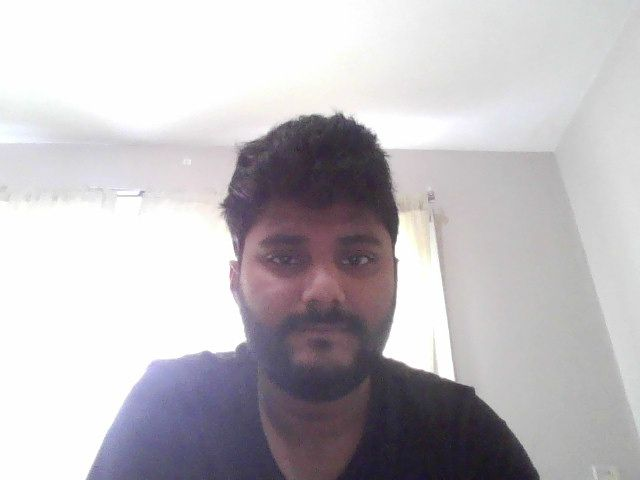

In [11]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

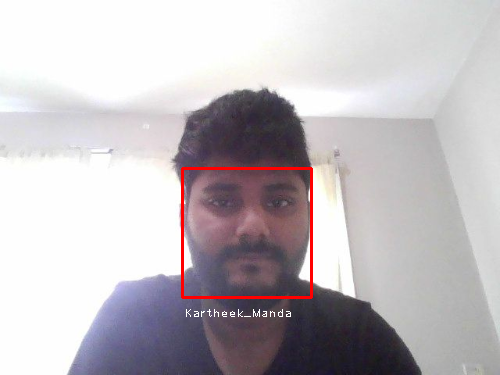

In [12]:
img = read_img('./' + 'photo.jpg')
img_enc = face_recognition.face_encodings(img)[0]
  
results = face_recognition.compare_faces(known_encodings, img_enc)

for i in range(len(results)):
    if results[i]:
      name = known_names[i]
      (top, right, bottom, left) = face_recognition.face_locations(img)[0]
      cv2.rectangle(img, (left, top), (right, bottom), (0, 0, 255), 2)
      cv2.putText(img, name, (left+2, bottom+20), cv2.FONT_HERSHEY_PLAIN, 0.8, (255, 255, 255), 1)
      cv2_imshow(img)